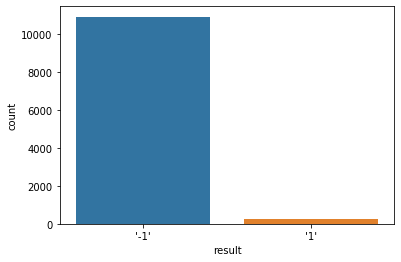

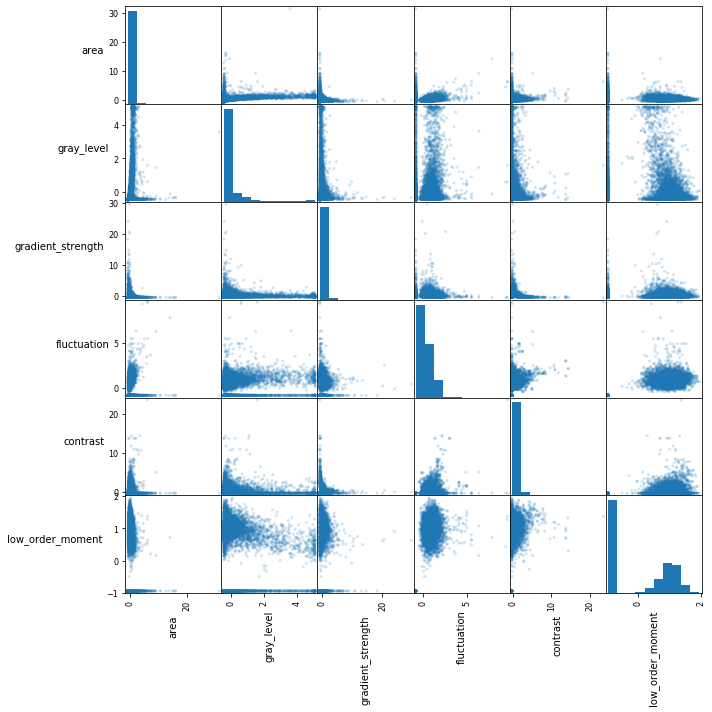

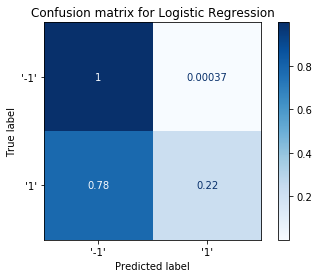

Results for Logistic Regression:
True Positive: 26
False Positive: 2
True Negative: 5472
False Negative: 91
Precision: 0.9285714285714286
Recall: 0.2222222222222222
Accuracy: 0.983366124128063
F1 score: 0.3586206896551724
Specificity: 0.999634636463281
---------------


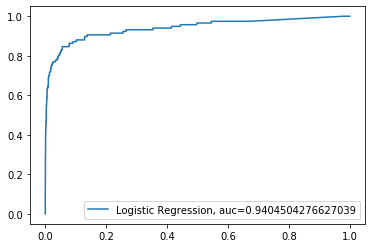

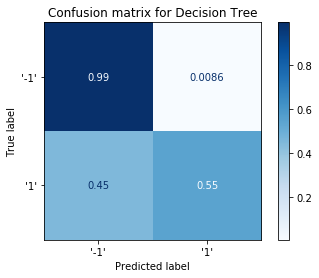

Results for Decision Tree:
True Positive: 64
False Positive: 47
True Negative: 5427
False Negative: 53
Precision: 0.5765765765765766
Recall: 0.5470085470085471
Accuracy: 0.9821141119656591
F1 score: 0.5614035087719298
Specificity: 0.9914139568871027
---------------


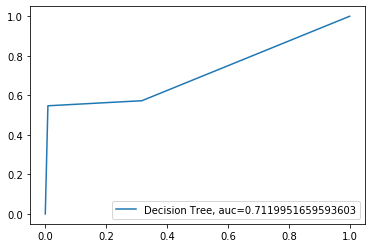

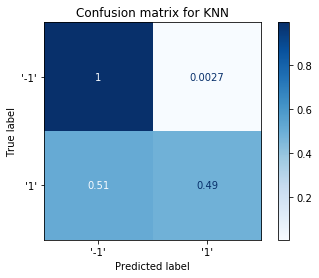

Results for KNN:
True Positive: 57
False Positive: 15
True Negative: 5459
False Negative: 60
Precision: 0.7916666666666666
Recall: 0.48717948717948717
Accuracy: 0.9865855839742443
F1 score: 0.6031746031746031
Specificity: 0.9972597734746073
---------------


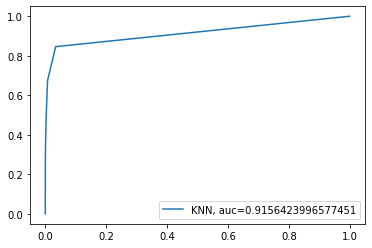

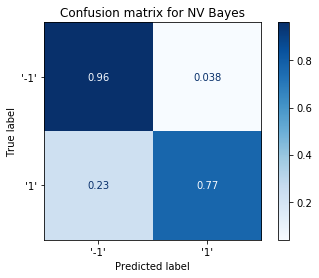

Results for NV Bayes:
True Positive: 90
False Positive: 209
True Negative: 5265
False Negative: 27
Precision: 0.3010033444816054
Recall: 0.7692307692307693
Accuracy: 0.9577893042389555
F1 score: 0.4326923076923077
Specificity: 0.9618195104128608
---------------


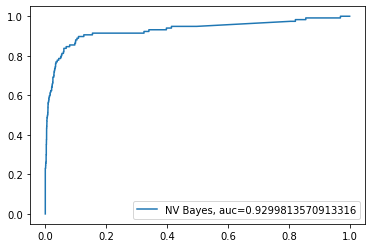

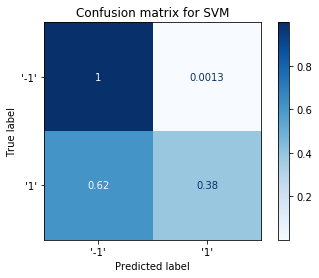

Results for SVM:
True Positive: 45
False Positive: 7
True Negative: 5467
False Negative: 72
Precision: 0.8653846153846154
Recall: 0.38461538461538464
Accuracy: 0.9858701484528707
F1 score: 0.5325443786982249
Specificity: 0.9987212276214834
---------------


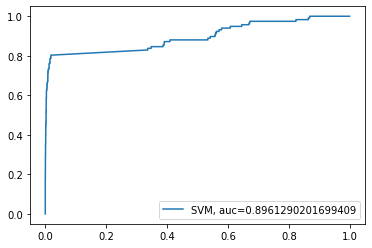

In [1]:
#Libraries import

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn import metrics

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123) 

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot



url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/mammography.csv'

git_data = pd.read_csv(url)
column_names = ['area', 'gray_level', 'gradient_strength', 'fluctuation', 'contrast','low_order_moment','result']
mydata = pd.DataFrame(data = git_data.iloc[:,0:].values, columns = column_names)

#mydata = pd.read_csv(r"/Users/vassilis/Desktop/ml/xs/mammography.csv")

                     
#Loading data from csv file
#mydata = pd.read_csv('mammography.csv')

#Visualized the Histogram which presents the aggregate of the data of each class
import seaborn as sns
sns.countplot(mydata['result'],label="Count")
plt.show()




#Stored in a list the names of each column will use in classification
feature_names = ['area', 'gray_level', 'gradient_strength', 'fluctuation', 'contrast','low_order_moment']
X = pd.DataFrame(data = git_data.iloc[:,0:6].values, columns = feature_names) #Make the matrix with columns
#X = git_data
#X = mydata[feature_names] #Make the matrix with columns
y = mydata['result'] #make the label of columns

#Scatter Matrix Implementation
axes = pd.plotting.scatter_matrix(X,alpha=0.2, figsize=[10, 10])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()    
    
#Computation of the correlation beetween features
#and removed the correlated features
label_encoder = LabelEncoder()
X.iloc[:,0] = label_encoder.fit_transform(X.iloc[:,0]).astype('float64')

corr = X.corr()


columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr. iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]


#split train and test set (50-50 the best accuracy)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.50,train_size=0.50) 


#dpp Data Normalization with MinMaxMethod
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #Model Train


#Confusion Matrix
matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Logistic Regression')
plt.show(matrix)
plt.show()


predicted_log  = logreg.predict(X_test); #Prediction

#Remove the index
desired = y_test.values 




#Manually computation of metrics for LR
tp=0 #true positive
fp=0 #false positiove 
tn=0 #true negative
fn=0 #false negative

for i in range(len(desired)):
    if desired[i]=="'1'" and predicted_log[i]=="'1'":
        tp=tp+1
    elif desired[i]=="'1'" and predicted_log[i]=="'-1'":
        fn=fn+1
    elif desired[i]=="'-1'" and predicted_log[i]=="'-1'":
        tn=tn+1
    else:
        fp=fp+1
print("Results for Logistic Regression:")
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)
precision = tp/(tp+fp) #precision metric for LR

recall = tp/(tp+fn) #recall metric for LR

accuracy = (tp+tn)/(tp + tn + fp + fn) #accuracy metric for LR

f1= 2*(precision*recall)/(precision+recall) #f1score metric for LR

specificity = (tn)/(tn+fp) #specificity for LR


print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("Specificity:",specificity)

print("---------------")



#roc curve for Logistic Regression
y_pred_proba = logreg.predict_proba(X_test)[::,1] #include probalities from model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="'1'")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()



#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train) #Trainning


predicted_dc = clf.predict(X_test) #predection

#Confusion Matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Decision Tree')
plt.show(matrix)
plt.show()


#Manually computation of metrics for DT
tp=0 #true positive
fp=0 #false positiove 
tn=0 #true negative
fn=0 #false negative

for i in range(len(desired)):
    if desired[i]=="'1'" and predicted_dc[i]=="'1'":
        tp=tp+1
    elif desired[i]=="'1'" and predicted_dc[i]=="'-1'":
        fn=fn+1
    elif desired[i]=="'-1'" and predicted_dc[i]=="'-1'":
        tn=tn+1
    else:
        fp=fp+1
print("Results for Decision Tree:")
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)

precision = tp/(tp+fp) #precision DT

recall = tp/(tp+fn) #recall DT

accuracy = (tp+tn)/(tp + tn + fp + fn) #accuracy DT

f1= 2*(precision*recall)/(precision+recall) #f1 score DT

specificity = (tn)/(tn+fp) #specificity DT


print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("Specificity:",specificity)

print("---------------")


#roc curve for DT
y_pred_proba = clf.predict_proba(X_test)[::,1] #include probalities from DT model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="'1'")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) #Trainning


predicted_knn=knn.predict(X_test) #Prediction


#Confusion Matrix
matrix = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for KNN')
plt.show(matrix)
plt.show()


#Manually computation of metrics for KNN
tp=0 #true positive for KNN
fp=0 #false positiove for KNN
tn=0 #true negativef or KNN
fn=0 #false negative for KNN

for i in range(len(desired)):
    if desired[i]=="'1'" and predicted_knn[i]=="'1'":
        tp=tp+1
    elif desired[i]=="'1'" and predicted_knn[i]=="'-1'":
        fn=fn+1
    elif desired[i]=="'-1'" and predicted_knn[i]=="'-1'":
        tn=tn+1
    else:
        fp=fp+1

print("Results for KNN:")
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)

precision = tp/(tp+fp) #precision KNN

recall = tp/(tp+fn) #Recall KNN

accuracy = (tp+tn)/(tp + tn + fp + fn) #Accuracy KNN

f1= 2*(precision*recall)/(precision+recall) #F1 Score KNN

specificity = (tn)/(tn+fp) #Specificity KNN


print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("Specificity:",specificity)

print("---------------")

#roc curve for KNN
y_pred_proba = knn.predict_proba(X_test)[::,1] #include probalities from KNN model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="'1'")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#Naive#include probalities from DT model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train) #train

bayes_predicted = gnb.predict(X_test) #prediction


#Confusion Matrix
matrix = plot_confusion_matrix(gnb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for NV Bayes')
plt.show(matrix)
plt.show()


#Manually computation of metrics for NVB
tp=0 #true positive
fp=0 #false positiove 
tn=0 #true negative
fn=0 #false negative

for i in range(len(desired)):
    if desired[i]=="'1'" and bayes_predicted[i]=="'1'":
        tp=tp+1
    elif desired[i]=="'1'" and bayes_predicted[i]=="'-1'":
        fn=fn+1
    elif desired[i]=="'-1'" and bayes_predicted[i]=="'-1'":
        tn=tn+1
    else:
        fp=fp+1
print("Results for NV Bayes:")
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)

precision = tp/(tp+fp) #precision for NVB

recall = tp/(tp+fn) #recall for NVB

accuracy = (tp+tn)/(tp + tn + fp + fn) #accuracy for NVB

f1= 2*(precision*recall)/(precision+recall) #F1 Score for NVB

specificity = (tn)/(tn+fp) #Specificity for NVB


print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("Specificity:",specificity)

print("---------------")

#roc curve for NVB
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="'1'")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="NV Bayes, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train) #train

svm_predicted = svm.predict(X_test) #prediction


#Manually computation of metrics for SVM
matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM')
plt.show(matrix)
plt.show()

#Manually computation of metrics for NVB
tp=0 #true positive
fp=0 #false positiove 
tn=0 #true negative
fn=0 #false negative

for i in range(len(desired)):
    if desired[i]=="'1'" and svm_predicted[i]=="'1'":
        tp=tp+1
    elif desired[i]=="'1'" and svm_predicted[i]=="'-1'":
        fn=fn+1
    elif desired[i]=="'-1'" and svm_predicted[i]=="'-1'":
        tn=tn+1
    else:
        fp=fp+1
print("Results for SVM:")
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)
precision = tp/(tp+fp) #precision for SVM

recall = tp/(tp+fn) #recall for SVM

accuracy = (tp+tn)/(tp + tn + fp + fn) #accurasy for SVM

f1= 2*(precision*recall)/(precision+recall) #f1 score for SVM

specificity = (tn)/(tn+fp) #specificity for SVM


print("Precision:",precision)
print("Recall:",recall)
print("Accuracy:",accuracy)
print("F1 score:",f1)
print("Specificity:",specificity)

print("---------------")




#roc curve for NVB
y_pred_proba = svm.predict_proba(X_test)[::,1] #include prob from SVM model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label="'1'")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.legend(loc=4)
plt.show()
